In [1]:
#Import libraries
import math
import numpy as np
import nltk
from nltk.corpus import brown
from nltk.util import pad_sequence
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#Names of categories in the brown corpus
listCat = list(brown.categories()) #Categories
print("Number of categories in brown corpus: ", len(listCat))

words = nltk.corpus.brown.words()
print("Total number of words: ", len(words)) # 1161192 words (> 1 million)

alpha = [word.lower() for word in words if word.isalpha()] 
print("Total number of English words: ", len(alpha)) # 981716 English words

sents = list(nltk.corpus.brown.sents()) 
print("Number of sentences in brown corpus: ", len(sents)) #57340 sentences

print("Total number of unique English words: ", len(set(alpha))) # 40234 vocabulary words

Number of categories in brown corpus:  15
Total number of words:  1161192
Total number of English words:  981716
Number of sentences in brown corpus:  57340
Total number of unique English words:  40234


In [3]:
#Unigram frequency and probabilities
freq_brown_1gram = nltk.FreqDist(brown.words()) #56057 word samples including punctuation marks
len_brown = len(brown.words())

def unigram_prob(word):
    return freq_brown_1gram[ word] / len_brown

print("Number of unigram: ", len(list(freq_brown_1gram)))
print("Probability of word Fulton is: ",unigram_prob("Fulton")) #1.4640128419761762e-05

Number of unigram:  56057
Probability of word Fulton is:  1.4640128419761762e-05


In [4]:
#Bigram frequency and probabilities using MLE
cfreq2gram = nltk.ConditionalFreqDist(nltk.bigrams(brown.words()))
cprob2gram = nltk.ConditionalProbDist(cfreq2gram, nltk.MLEProbDist)

print("Number of bigrams: ", len(list(cfreq2gram))) #56057
print("Number of words that can follow United is: ", cfreq2gram["United"]) #<FreqDist with 16 samples and 463 outcomes>
print("Probability of bigram United States is: ", cprob2gram["United"].prob("States")) # 0.8466522678185745

Number of bigrams:  56057
Number of words that can follow United is:  <FreqDist with 16 samples and 463 outcomes>
Probability of bigram United States is:  0.8466522678185745


In [5]:
#Trigram frequency and probabilities using MLE
brown3gram = nltk.trigrams(brown.words())
condition_pairs = (((w0, w1), w2) for w0, w1, w2 in brown3gram)
cfreq3gram = nltk.ConditionalFreqDist(condition_pairs)
cprob3gram= nltk.ConditionalProbDist(cfreq3gram, nltk.MLEProbDist)

print("Number of trigrams: ", len(list(cfreq3gram))) #455266
print("Number of words that can follow United States is: ", cfreq3gram["United","States"])
#<FreqDist with 132 samples and 392 outcomes>
print("Probability of trigram United States of is: ", cprob3gram["United", "States"].prob("of")) #0.08163265306122448

Number of trigrams:  455266
Number of words that can follow United States is:  <FreqDist with 132 samples and 392 outcomes>
Probability of trigram United States of is:  0.08163265306122448


In [6]:
#Quadgram frequency and probabilities using MLE
brown4gram = nltk.ngrams(brown.words(),4)
condition_pairs = (((w0, w1,w2), w3) for w0, w1, w2,w3 in brown4gram)
cfreq4gram = nltk.ConditionalFreqDist(condition_pairs)
cprob4gram= nltk.ConditionalProbDist(cfreq4gram, nltk.MLEProbDist)

print("Number of quadgrams: ", len(list(cfreq4gram))) #907493
print("Number of words that can follow of the United States of is: ", cfreq4gram["United","States","of"])
#<FreqDist with 3 samples and 32 outcomes>
print("Probability of quadgram United States of America is: ", cprob4gram["United", "States", "of"].prob("America")) #0.90625

Number of quadgrams:  907493
Number of words that can follow of the United States of is:  <FreqDist with 3 samples and 32 outcomes>
Probability of quadgram United States of America is:  0.90625


In [7]:
#Function to calculate conditional probability and perplexity of test set - Bigram Language Model

# P(how do you do) = P(how) * P(do|how) * P(you|do) * P(do | you)
# Entropy = -[P(how) * log2P(how) +  P(do|how) * log2P(do|how) + P(you|do) *log2P(you|do)  + P(do | you)*log2P(do | you)]
# Perplexity = 2 ** Entropy

def bgmPerp(List):
    words = List[0].split()
    #print(words)
   
    prodPr = unigram_prob(words[0]) #Calculate probability of Unigram
    #print("Unigram", words[0], "Probability: ", prodPr)
    if prodPr > 0:
        lpU = math.log(prodPr,2)
    else:
        lpU = 0
    
    #lpU = math.log(prU,2) 
    entBgm = prodPr * lpU
    #print("Entropy of unigram without negative sign: ",entBgm)

    N = len(words)

    for i in range(1,N):
        prB = cprob2gram[words[i-1]].prob(words[i]) #Calculate probability of Bigram
        prodPr = prodPr*prB # Cumulative multiply probabilities to get conditional probability of test set
        #print("MLE of Bigram", words[i-1], words[i], ": ", prB)
        if prB > 0:
            lpB = math.log(prB,2)
        else:
            lpB = 0
        ent = prB * lpB #Entropy of specific bigram
        entBgm = entBgm + ent #Cumulative summation to obtain entropy of test set 

    print("Probability of test sentence using Bigram Model: ", prodPr )
    print("Model Perplexity Bigram: ",2** (-(entBgm))) 
    perpBgm = 2** (-(entBgm)) #Calculate perplexity
    #print("MLE of the sentence: ", prodPr)
    #print("Perplexity of the model: ", Perp)
    probPerpBgm = [prodPr, perpBgm] #Return conditional probability and perplexity of test set
    
    return probPerpBgm

In [8]:
#Function to calculate conditional probability and perplexity of test set - Trigram Language Model

# P(how do you do) = P(how) * P(do|how) * P(you| how do) * P(do | do you)

# Entropy = -[P(how) * log2P(how) +  P(do|how) * log2P(do|how) 
#             + P(you| how do) *log2P(you| how do) + P(do|do you)*log2P(do | do you)]

# Perplexity = 2 ** Entropy

def tgmPerp(List):
    words = List[0].split()
    #print(words)
   
    probU = unigram_prob(words[0]) #Calculate probability of Unigram
    #print("Unigram", words[0], "Probability: ", probU)
    lpU = math.log(probU,2)
    
    entTgm = probU * lpU
    #print("Entropy of unigram without negative sign after Unigram: ",entTgm)
    
    probB = cprob2gram[words[0]].prob(words[1]) #Calculate probability of Bigram
    probTgm = probB * probU # multiplication of Unigram and Bigram probability
    lpB = math.log(probB,2)
    
    entTgm = entTgm + probB * lpB
    #print("Entropy of unigram and bigram without negative sign after Bigram: ",entTgm)

    N = len(words)

    for i in range(2,N):
        probT = cprob3gram[words[i-2],words[i-1]].prob(words[i])  #Calculate probability of Trigram
        probTgm = probTgm * probT # Cumulative multiply probabilities to get conditional probability of test set
        #print("MLE of Bigram", words[i-1], words[i], ": ", prB)
        lpT = math.log(probT,2)
        prodTgm = probT * lpT
        entTgm = entTgm + prodTgm #Cumulative summation to obtain entropy of test set 

    PerpTgm = 2** (-(entTgm))
    print("Probability of test sentence using Trigram Model: ", probTgm )
    print("Model Perplexity Trigram: ",2** (-(entTgm)))
    #print("MLE of the sentence: ", sumPr)
    #print("Perplexity of the model: ", Perp)
    probPerpTgm = [probTgm, PerpTgm]
    
    return probPerpTgm

In [9]:
#Function to calculate conditional probability and perplexity of test set - Quadgram Language Model

# P(how do you do) = P(how) * P(do|how) * P(you| how do) * P(do | how do you)

# Entropy = -[P(how) * log2P(how) +  P(do|how) * log2P(do|how) 
#             + P(you| how do) *log2P(you| how do) + P(do| how do you)*log2P(do | how do you)]

# Perplexity = 2 ** Entropy


def qgmPerp(List):
    words = List[0].split()
    #print(words)
   
    probU = unigram_prob(words[0]) #Calculate probability of Unigram
    #print("Unigram", words[0], "Probability: ", probU)
    lpU = math.log(probU,2)
    
    entQgm = probU * lpU
    #print("Entropy of unigram without negative sign after Unigram: ",entTgm)
    probB = cprob2gram[words[0]].prob(words[1]) #Calculate probability of Bigram
    
    probQgm = probB * probU # multiplication of Unigram and Bigram probability
    lpB = math.log(probB,2)
    
    entQgm = entQgm + probB * lpB 
    #print("Entropy of unigram without negative sign after Bigram: ",entTgm)
    
    probT = cprob3gram[words[0],words[1]].prob(words[2]) #Calculate probability of Trigram
    lpT = math.log(probT,2)
    
    entQgm = entQgm + probT * lpT
    probQgm = probQgm * probT

    N = len(words)

    for i in range(3,N):
        probQ = cprob4gram[words[i-3],words[i-2],words[i-1]].prob(words[i]) #Calculate probability of Quadgram
        probQgm = probQgm * probQ # Cumulative multiply probabilities to get conditional probability of test set
        #print("MLE of Bigram", words[i-1], words[i], ": ", prB)
        lpQ = math.log(probQ,2)
        prod = probT * lpT
        entQgm = entQgm + prod #Cumulative summation to obtain entropy of test set 

    Perp = 2** (-(entQgm))
    print("Probability of test sentence using Quadgram Model: ", probQgm )
    print("Model Perplexity Quadgram: ",2** (-(entQgm)))
    #print("MLE of the sentence: ", sumPr)
    #print("Perplexity of the model: ", Perp)
    probPerp = [probQgm, Perp]
    
    return probPerp

In [10]:
#Test of bigram language model - Based on first few words from romance category in Brown corpus

#Create test words from the vocabulary of the corpus
EightWords = bgmPerp(['They neither liked nor disliked the Old Man'])
SevenWords = bgmPerp(['They neither liked nor disliked the Old'])
SixWords = bgmPerp(['They neither liked nor disliked the'])
FiveWords = bgmPerp(['They neither liked nor disliked'])
FourWords = bgmPerp(['They neither liked nor'])

#Create a list that holds the result of probabilities and perplexity
PPBgm = [EightWords, SevenWords, SixWords, FiveWords, FourWords]

#Create a dataframe to store the number of words, its probability and model perplexity
ppBDF = pd.DataFrame(PPBgm, columns = ['Bgm Prob','Bgm PP'])
nWords = [8,7,6,5,4]
ppBDF['Number of Words'] = nWords
colName = 'Number of Words'
first_col = ppBDF.pop(colName)
ppBDF.insert(0,colName, first_col)

Probability of test sentence using Bigram Model:  2.8948461169434444e-17
Model Perplexity Bigram:  2.1481407782746427
Probability of test sentence using Bigram Model:  1.9230049205410024e-16
Model Perplexity Bigram:  1.615352753075985
Probability of test sentence using Bigram Model:  3.173615988997049e-13
Model Perplexity Bigram:  1.6081173426644568
Probability of test sentence using Bigram Model:  1.7454887939483771e-12
Model Perplexity Bigram:  1.1795227928000211
Probability of test sentence using Bigram Model:  2.7753271823779194e-10
Model Perplexity Bigram:  1.1425127953520748


<Figure size 1440x720 with 0 Axes>

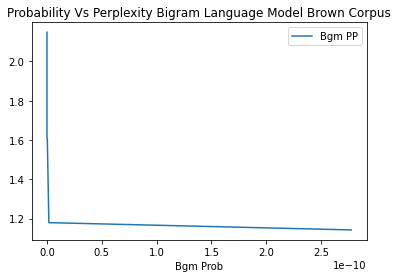

<Figure size 1440x720 with 0 Axes>

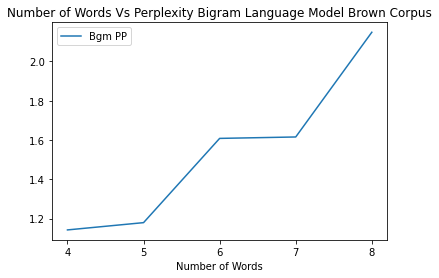

In [11]:
# plot Bigram Model Probability Vs Perplexity
# Model Perplexity is inversely proportional to the word probability 
plt.figure(figsize=(20,10))
ppBDF.plot.line(x = 'Bgm Prob', y = 'Bgm PP')
plt.title('Probability Vs Perplexity Bigram Language Model Brown Corpus')
plt.show()

# plot Bigram Model Perplexity Vs Number of words
# As number of word  in the test sentence increases, model perplexity increases
plt.figure(figsize=(20,10))
ppBDF.plot.line(x = 'Number of Words', y = 'Bgm PP')
plt.xticks(np.arange(4, 9, step=1))
plt.title('Number of Words Vs Perplexity Bigram Language Model Brown Corpus')
plt.show()

In [12]:
#Test of trigram language model - Based on Brown corpus

#Create test words from the vocabulary of the corpus
EightWordsT = tgmPerp(['They neither liked nor disliked the Old Man'])
SevenWordsT = tgmPerp(['They neither liked nor disliked the Old'])
SixWordsT = tgmPerp(['They neither liked nor disliked the'])
FiveWordsT = tgmPerp(['They neither liked nor disliked'])
FourWordsT = tgmPerp(['They neither liked nor'])

#Create a list that holds the result of probabilities and perplexity
PPTgm = [EightWordsT, SevenWordsT, SixWordsT, FiveWordsT, FourWordsT]

#Create a dataframe to store the number of words, its probability and model perplexity
ppTDF = pd.DataFrame(PPTgm, columns = ['Tgm Prob','Tgm PP'])
nWords = [8,7,6,5,4]
ppTDF['Number of Words'] = nWords
colName = 'Number of Words'
first_col = ppTDF.pop(colName)
ppTDF.insert(0,colName, first_col)

Probability of test sentence using Trigram Model:  1.0198231871351072e-07
Model Perplexity Trigram:  2.8686357192281617
Probability of test sentence using Trigram Model:  4.3059201234593417e-07
Model Perplexity Trigram:  2.039486964189216
Probability of test sentence using Trigram Model:  8.611840246918683e-07
Model Perplexity Trigram:  1.4421350625197602
Probability of test sentence using Trigram Model:  8.611840246918683e-07
Model Perplexity Trigram:  1.4421350625197602
Probability of test sentence using Trigram Model:  8.611840246918683e-07
Model Perplexity Trigram:  1.4421350625197602


<Figure size 1440x720 with 0 Axes>

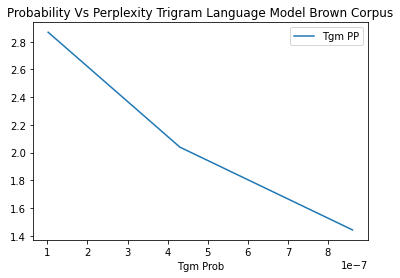

<Figure size 1440x720 with 0 Axes>

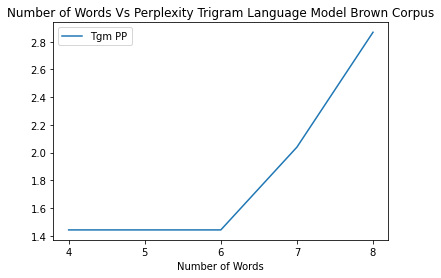

In [13]:
# plot Trigram Probability Vs Perplexity
# Model Perplexity is inversely proportional to the word probability
plt.figure(figsize=(20,10))
ppTDF.plot.line(x = 'Tgm Prob', y = 'Tgm PP')
plt.title('Probability Vs Perplexity Trigram Language Model Brown Corpus')
plt.show()

# plot Trigram Perplexity Vs Number of words
# As number of word  in the test sentence increases, model perplexity increases
plt.figure(figsize=(20,10))
ppTDF.plot.line(x = 'Number of Words', y = 'Tgm PP')
plt.xticks(np.arange(4, 9, step=1))
plt.title('Number of Words Vs Perplexity Trigram Language Model Brown Corpus')
plt.show()

In [14]:
#Test of Quadgram language model - Based on Brown corpus

#Create test words from the vocabulary of the corpus
EightWordsQ = qgmPerp(['They neither liked nor disliked the Old Man'])
SevenWordsQ = qgmPerp(['They neither liked nor disliked the Old'])
SixWordsQ = qgmPerp(['They neither liked nor disliked the'])
FiveWordsQ = qgmPerp(['They neither liked nor disliked'])
FourWordsQ = qgmPerp(['They neither liked nor'])

#Create a list that holds the result of probabilities and perplexity
PPQgm = [EightWordsQ, SevenWordsQ, SixWordsQ, FiveWordsQ, FourWordsQ]

#Create a dataframe to store the number of words, its probability and model perplexity
ppQDF = pd.DataFrame(PPQgm, columns = ['Qgm Prob','Qgm PP'])
nWords = [8,7,6,5,4]
ppQDF['Number of Words'] = nWords
colName = 'Number of Words'
first_col = ppQDF.pop(colName)
ppQDF.insert(0,colName, first_col)

Probability of test sentence using Quadgram Model:  8.611840246918683e-07
Model Perplexity Quadgram:  8.157947856756866
Probability of test sentence using Quadgram Model:  8.611840246918683e-07
Model Perplexity Quadgram:  5.768540250079042
Probability of test sentence using Quadgram Model:  8.611840246918683e-07
Model Perplexity Quadgram:  4.078973928378433
Probability of test sentence using Quadgram Model:  8.611840246918683e-07
Model Perplexity Quadgram:  2.8842701250395204
Probability of test sentence using Quadgram Model:  8.611840246918683e-07
Model Perplexity Quadgram:  2.039486964189216


<Figure size 1440x720 with 0 Axes>

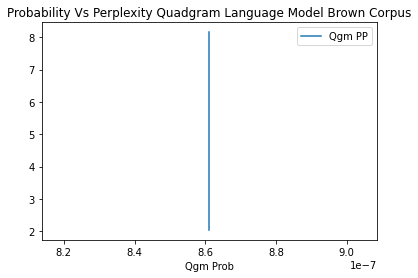

<Figure size 1440x720 with 0 Axes>

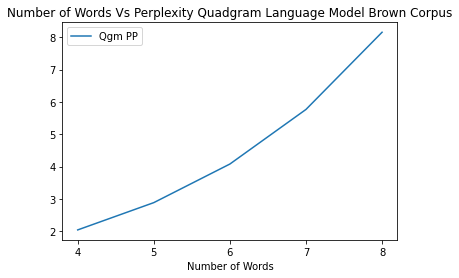

In [15]:
# plot Quadgram Model Probability Vs Perplexity
plt.figure(figsize=(20,10))
ppQDF.plot.line(x = 'Qgm Prob', y = 'Qgm PP')
plt.title('Probability Vs Perplexity Quadgram Language Model Brown Corpus')
plt.show()

# plot Quadgram Perplexity Vs Number of words
# As number of word  in the test sentence increases, model perplexity increases
plt.figure(figsize=(20,10))
ppQDF.plot.line(x = 'Number of Words', y = 'Qgm PP')
plt.xticks(np.arange(4, 9, step=1))
plt.title('Number of Words Vs Perplexity Quadgram Language Model Brown Corpus')
plt.show()

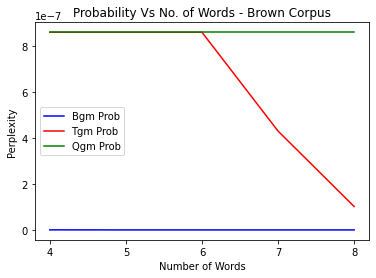

In [16]:
#Plot probability of test sentence for language models

#Merge three dataframes based on number of words
mergedDF1 = pd.merge(ppBDF, ppTDF, on='Number of Words')
#print(mergedDF1)
mergedDF = pd.merge(mergedDF1, ppQDF, on = 'Number of Words')
#print(mergedDF)

#As number of words increases, higher order ngrams has lower probability
plt.plot('Number of Words', 'Bgm Prob', data = ppBDF, color = 'blue')
plt.plot('Number of Words','Tgm Prob', data = ppTDF, color = 'red')
plt.plot('Number of Words','Qgm Prob', data = ppQDF, color = 'green')
plt.xlabel('Number of Words')
plt.ylabel('Perplexity')
plt.xticks(np.arange(4, 9, step=1))
plt.legend()
plt.title('Probability Vs No. of Words - Brown Corpus')
plt.show()

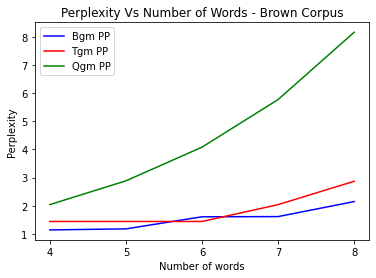

In [17]:
#Plot perplexity of test sentence for language models
#Lower the perplexity value of the model, the better it is

plt.plot('Number of Words', 'Bgm PP', data = ppBDF, color = 'blue')
plt.plot('Number of Words', 'Tgm PP', data = ppTDF, color = 'red')
plt.plot('Number of Words', 'Qgm PP', data = ppQDF, color = 'green')
plt.legend()
plt.xlabel('Number of words')
plt.ylabel('Perplexity')
plt.xticks(np.arange(4, 9, step=1))
plt.title('Perplexity Vs Number of Words - Brown Corpus')
plt.show()

<Figure size 1440x720 with 0 Axes>

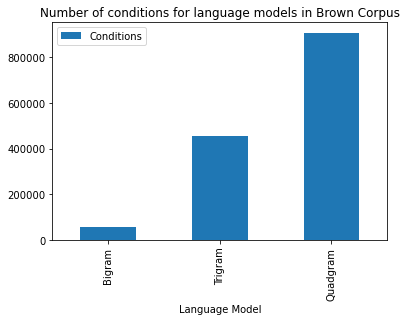

In [18]:
#Quadgram models are more perplexed as longer test sentences results in checking of more sequences
#Because Quadgram models have to examine more conditions than Trigram and Bigram models

#Number of conditions for Language models
bgmC = len(cprob2gram.conditions())
tgmC = len(cprob3gram.conditions())
qgmC = len(cprob4gram.conditions())

LM = [['Bigram',bgmC],['Trigram',tgmC],['Quadgram',qgmC]]
condDF = pd.DataFrame(LM, columns=['Language Model', 'Conditions'])

# plot the data
plt.figure(figsize=(20,10))
condDF.plot.bar(x = 'Language Model', y = 'Conditions')
plt.title('Number of conditions for language models in Brown Corpus')
plt.show()

<Figure size 1440x720 with 0 Axes>

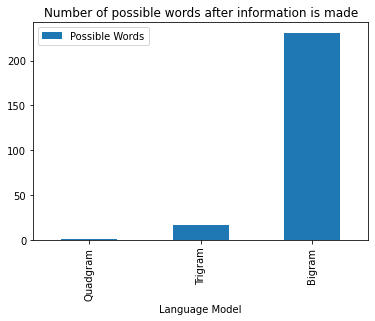

In [19]:
#Quadgram models can better predict the following word better for a given test sentence as it contains more train sequences

#Let us consider the sequence of words "information is made"

#Number of possible words following the presence of word sequence(s) for Language models
qWords = len(cfreq4gram["information","is","made"].keys())
tWords = len(cfreq3gram["is","made"].keys())
bWords = len(cfreq2gram["made"].keys())

LM = [['Quadgram',qWords],['Trigram',tWords],['Bigram',bWords]]
pWordsDF = pd.DataFrame(LM, columns=['Language Model', 'Possible Words'])

# plot the data
plt.figure(figsize=(20,10))
pWordsDF.plot.bar(x = 'Language Model', y = 'Possible Words')
plt.title('Number of possible words after information is made')
plt.show()

In [20]:
#Generate 10 words based on Test input of three words of "information is made" using Quadgram model
words = ["information", "is", "made"]

#Quadgram model is generating the next word correctly as "available"
print("Quadgram Model")
for index in range(10):
    word = cprob4gram[words[0],words[1],words[2]].generate()
    print(word, end = " ")

#Generate 10 words based on Test input of three words of "information is made" using Trigram model

#Trigram model has generated the correct word "available" few times as many options are available 
print("\n\nTrigram Model")
for index in range(10):
    word = cprob3gram[words[0],words[1]].generate()
    print(word, end = " ")

#Generate 10 words based on Test input of three words of "information is made" using Bigram model

#Unigram model has generated all kinds of words as many more options are available 
print("\n\nBigram Model")
for index in range(10):
    word = cprob2gram[words[0]].generate()
    print(word, end = " ")

Quadgram Model
available available available available available available available available available available 

Trigram Model
retrieved thus written made to available that carefully reasonably to 

Bigram Model
it to concerning elicited necessary and on . about and 

In [21]:
#Out of Vocabulary testing
oovWords = ["Bengaluru","is","cool","place"]

#Check the probability of the test sentence
print("Probability (place | Bengaluru is cool) (Quadgram model): ",
      cprob4gram[oovWords[0],oovWords[1],oovWords[2]].prob(oovWords[3]))
print("Probability (place | is cool) (Trigram model): ",
      cprob3gram[oovWords[1],oovWords[2]].prob(oovWords[3]))
print("Probability (place | cool) (Bigram model): ", cprob2gram[oovWords[3]]) #<MLEProbDist based on 528 samples>

#Assign non-zero probability for out of vocabulary words in developed language model
#Check if test words are available in vocabulary
vocab = set(nltk.corpus.brown.words())

for i in range(len(oovWords)):
    print("Is the word", oovWords[i], "present in vocabulary: ",oovWords[i] in vocab)

Probability (place | Bengaluru is cool) (Quadgram model):  0
Probability (place | is cool) (Trigram model):  0.0
Probability (place | cool) (Bigram model):  <MLEProbDist based on 528 samples>
Is the word Bengaluru present in vocabulary:  False
Is the word is present in vocabulary:  True
Is the word cool present in vocabulary:  True
Is the word place present in vocabulary:  True


In [22]:
#Unigram Model for out of vocabulary words

#P(w(i)) = Lambda * P (w(i)) + (1- Lambda) * (1/N)

#N = number of unique words
#95% of words available in corpus and 5% for out of vocabulary words
#Hence lambda is 0.95

N  = len(nltk.corpus.brown.words())
Lambda = 0.95
freq_brown_1gram = nltk.FreqDist(brown.words()) 

def uProb(word):
    prU = Lambda * (freq_brown_1gram[word]/N) + (1-Lambda) * (1/N)
    return prU
    
print("Words in vocabulary")
print("Probability of Unigram information without lambda: ", unigram_prob("information")) #0.00022218547837050203
print("Probability of Unigram information with lambda: ", uProb("information")) #0.00021111926365321152
print("Out of Vocabulary words")
print("Probability of Unigram Bengaluru without lambda: ", unigram_prob("Bengaluru")) #0.0
print("Probability of Unigram Bengaluru with lambda: ", uProb("Bengaluru")) #4.3059201234593454e-08

Words in vocabulary
Probability of Unigram information without lambda:  0.00022218547837050203
Probability of Unigram information with lambda:  0.00021111926365321152
Out of Vocabulary words
Probability of Unigram Bengaluru without lambda:  0.0
Probability of Unigram Bengaluru with lambda:  4.3059201234593454e-08


In [23]:
#Bigram model for out of vocabulary words

#P(w(i) / w(i-1)) = Lambda * P ( w(i) / w(i-1)) + (1- Lambda) * P(w(i))
#P(is/Bengaluru ) = Lambda * P(is/Bengaluru) + (1-Lambda) * P(is)

def bProb(List):
    
    Lambda = 0.95
    words = List[0].split()
    
    prodPr = uProb(words[0]) #Calculate probability of Unigram
    #print("Unigram", words[0], "Probability: ", prodPr)
    
    N = len(words)

    for i in range(1,N):
        prB = Lambda * (cprob2gram[words[i-1]].prob(words[i])) + (1-Lambda) * uProb(words[i]) #Calculate Bigram probability
        prodPr = prodPr*prB # Cumulative multiply probabilities to get conditional probability of test set
    
    print("Probability of test sentence using Bigram model with lambda :", prodPr)
        
    return prodPr

print("#############################################################")
print("Words in vocabulary")
print("#############################################################")
print("Probability of Bigram information is (without lambda) ")
bgmPerp(["information is"]) #Probability - 1.2917760370378025e-05 
print("Probability of Bigram information is (with lambda) ")
bProb(["information is"]) #Probability - 1.1747113410836165e-05
print("#############################################################")
print("Out of Vocabulary words")
print("#############################################################")
print("Probability of Bigram Bengaluru is (without lambda) ")
bgmPerp(["Bengaluru is"])#0
print("Probability of Bigram Bengaluru is (with lambda) ")
bProb(["Bengaluru is"]) #1.763336869964663e-11
print("#############################################################")

#############################################################
Words in vocabulary
#############################################################
Probability of Bigram information is (without lambda) 
Probability of test sentence using Bigram Model:  1.2917760370378025e-05
Model Perplexity Bigram:  1.1820742475171415
Probability of Bigram information is (with lambda) 
Probability of test sentence using Bigram model with lambda : 1.1747113410836165e-05
#############################################################
Out of Vocabulary words
#############################################################
Probability of Bigram Bengaluru is (without lambda) 
Probability of test sentence using Bigram Model:  0.0
Model Perplexity Bigram:  1.0
Probability of Bigram Bengaluru is (with lambda) 
Probability of test sentence using Bigram model with lambda : 1.763336869964663e-11
#############################################################


In [24]:
#For a test sentence Bengaluru is cool place, let us calculate probability using bigram model

#P(Bengaluru is cool place) = P(Bengaluru) * P(is/Bengaluru ) * P(cool/is ) * P(place/cool )

#P(Bengaluru) = Lambda * P (Bengaluru) + (1- Lambda) * (1/N)
#P(is/Bengaluru ) = Lambda * P(is/Bengaluru) + (1-Lambda) * P(is)
#P(cool/is ) = Lambda * P(cool/is) + (1-Lambda) * P(cool)
#P(place/cool ) = Lambda * P(place/cool) + (1-Lambda) * P(place)

#words = ["Bengaluru is cool place"]
print("#############################################################")
print("Probability of Bengaluru is cool place without lambda: ")
bgmPerp(["Bengaluru is cool place"]) #0
print("Probability of Bengaluru is cool place with lambda: ")
bProb(["Bengaluru is cool place"]) #2.8130901388473795e-17
print("#############################################################")

#############################################################
Probability of Bengaluru is cool place without lambda: 
Probability of test sentence using Bigram Model:  0.0
Model Perplexity Bigram:  1.0735036838373988
Probability of Bengaluru is cool place with lambda: 
Probability of test sentence using Bigram model with lambda : 2.8130901388473795e-17
#############################################################


In [25]:
#Create a sentence of 10 words after the user has provided inputs
#
#Let us take some random words from a specific category in brown corpus
words = nltk.corpus.brown.words(categories = "romance")
print("################################################################################################################")
print("Test sentence: ", words[110:120])
print("################################################################################################################")
#words selected are "rising up from"
wordsQ = ["rising", "up", "from"]

while len(wordsQ) < 10:
    new = cprob4gram[wordsQ[-3],wordsQ[-2],wordsQ[-1]].generate()
    wordsQ.append(new)
print("Quadgram Model", wordsQ)
print("################################################################################################################")
#
#

wordsT = ["rising", "up", "from"]
while len(wordsT) < 10:
    new = cprob3gram[wordsT[-2],wordsT[-1]].generate()
    wordsT.append(new)
print("Trigram Model", wordsT)
print("################################################################################################################")
#
#
wordsB = ["rising", "up", "from"]
while len(wordsB) < 10:
    new = cprob2gram[wordsB[-1]].generate()
    wordsB.append(new)
print("Bigram Model", wordsB)
print("################################################################################################################")

################################################################################################################
Test sentence:  ['rising', 'up', 'from', 'aluminum', 'trays', 'wrapped', 'in', 'fly-dotted', 'cheesecloth', '.']
################################################################################################################
Quadgram Model ['rising', 'up', 'from', 'aluminum', 'trays', 'wrapped', 'in', 'fly-dotted', 'cheesecloth', '.']
################################################################################################################
Trigram Model ['rising', 'up', 'from', 'there', 'and', 'arguing', 'that', 'he', 'would', 'ever']
################################################################################################################
Bigram Model ['rising', 'up', 'from', 'an', 'eight-inch', 'level', 'fed', 'therewith', '.', 'One']
################################################################################################################
